<a href="https://colab.research.google.com/github/Ben-Sicat/ml-dl/blob/master/imagre%20processing/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import ImageDataGenerator
# Load themnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape,"x_test shape:", x_test.shape, "y_test shape:", y_test.shape)


x_train shape: (60000, 28, 28) y_train shape: (60000,) x_test shape: (10000, 28, 28) y_test shape: (10000,)


In [2]:
np.random.seed(0)

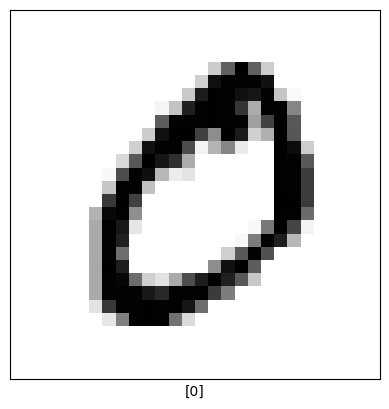

In [3]:
# Show one of the images from the training dataset
plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[1]])
plt.imshow(x_train[1],cmap=plt.cm.binary)

In [4]:
# Normalize the pixel values to the range [0, 1]

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape image channel for greyscale

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)



In [5]:
# Augment the data to bring diversity to the dataset and basically make a shit ton more
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

datagen.fit(x_train)

In [6]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)         

In [7]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [8]:
x_train = x_train.reshape(-1,28, 28,1)#Reshape for CNN
x_test = x_test.reshape(-1,28, 28, 1)


In [9]:
model_log=model.fit(x_train, y_train,
          batch_size=60,
          epochs=10,
          verbose=1,
          validation_split=.3)
#shit gpu 90+ % on google collab

Epoch 1/10


700/700 [==============================] - 25s 34ms/step - loss: 0.3862 - accuracy: 0.8763 - val_loss: 0.1082 - val_accuracy: 0.9683
Epoch 2/10
700/700 [==============================] - 21s 30ms/step - loss: 0.1436 - accuracy: 0.9560 - val_loss: 0.0716 - val_accuracy: 0.9773
Epoch 3/10
700/700 [==============================] - 21s 29ms/step - loss: 0.1116 - accuracy: 0.9650 - val_loss: 0.0578 - val_accuracy: 0.9829
Epoch 4/10
700/700 [==============================] - 25s 35ms/step - loss: 0.0884 - accuracy: 0.9719 - val_loss: 0.0537 - val_accuracy: 0.9833
Epoch 5/10
700/700 [==============================] - 27s 38ms/step - loss: 0.0804 - accuracy: 0.9753 - val_loss: 0.0484 - val_accuracy: 0.9857
Epoch 6/10
700/700 [==============================] - 29s 41ms/step - loss: 0.0733 - accuracy: 0.9773 - val_loss: 0.0478 - val_accuracy: 0.9851
Epoch 7/10
700/700 [==============================] - 25s 36ms/step - loss: 0.0675 - accuracy: 0.9793 - val_loss: 0.0420 - val_accurac

In [10]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9897000193595886


In [11]:
predictions = model.predict(x_test)
predictions[0]

313/313 [==============================] - 2s 6ms/step


array([2.7751521e-10, 1.8614033e-08, 1.8448924e-07, 9.7393036e-07,
       8.3326922e-11, 9.5542119e-10, 7.4224582e-14, 9.9999678e-01,
       2.4725655e-09, 2.0560967e-06], dtype=float32)

In [12]:
np.argmax(predictions[0])

7

In [13]:
x_test = x_test.reshape(-1,28, 28)
x_test.shape

(10000, 28, 28)

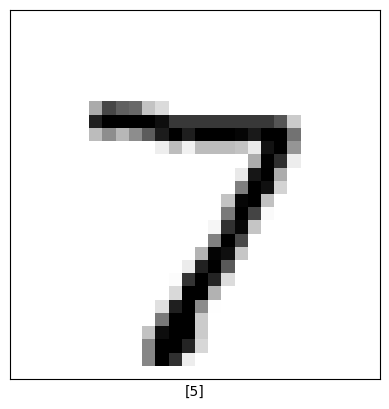

In [14]:
# Show one of the images from the test dataset
plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[0]])
plt.imshow(x_test[0],cmap=plt.cm.binary)


In [15]:
def plot_image(i, predictions_array, true_label, img):
    plt.imshow(img[i], cmap=plt.cm.binary)
    plt.xlabel(f"{np.argmax(predictions_array[i])} {100*np.max(predictions_array[i]):2.0f}% ({true_label[i]})", color=('blue' if np.argmax(predictions_array[i]) == true_label[i] else 'red'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

def plot_value_array(i, predictions_array, true_label):
    plt.bar(range(10), predictions_array[i], color="#777777")
    plt.ylim([0, 1])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.gca().get_children()[np.argmax(predictions_array[i])].set_color('red')
    plt.gca().get_children()[true_label[i]].set_color('blue')


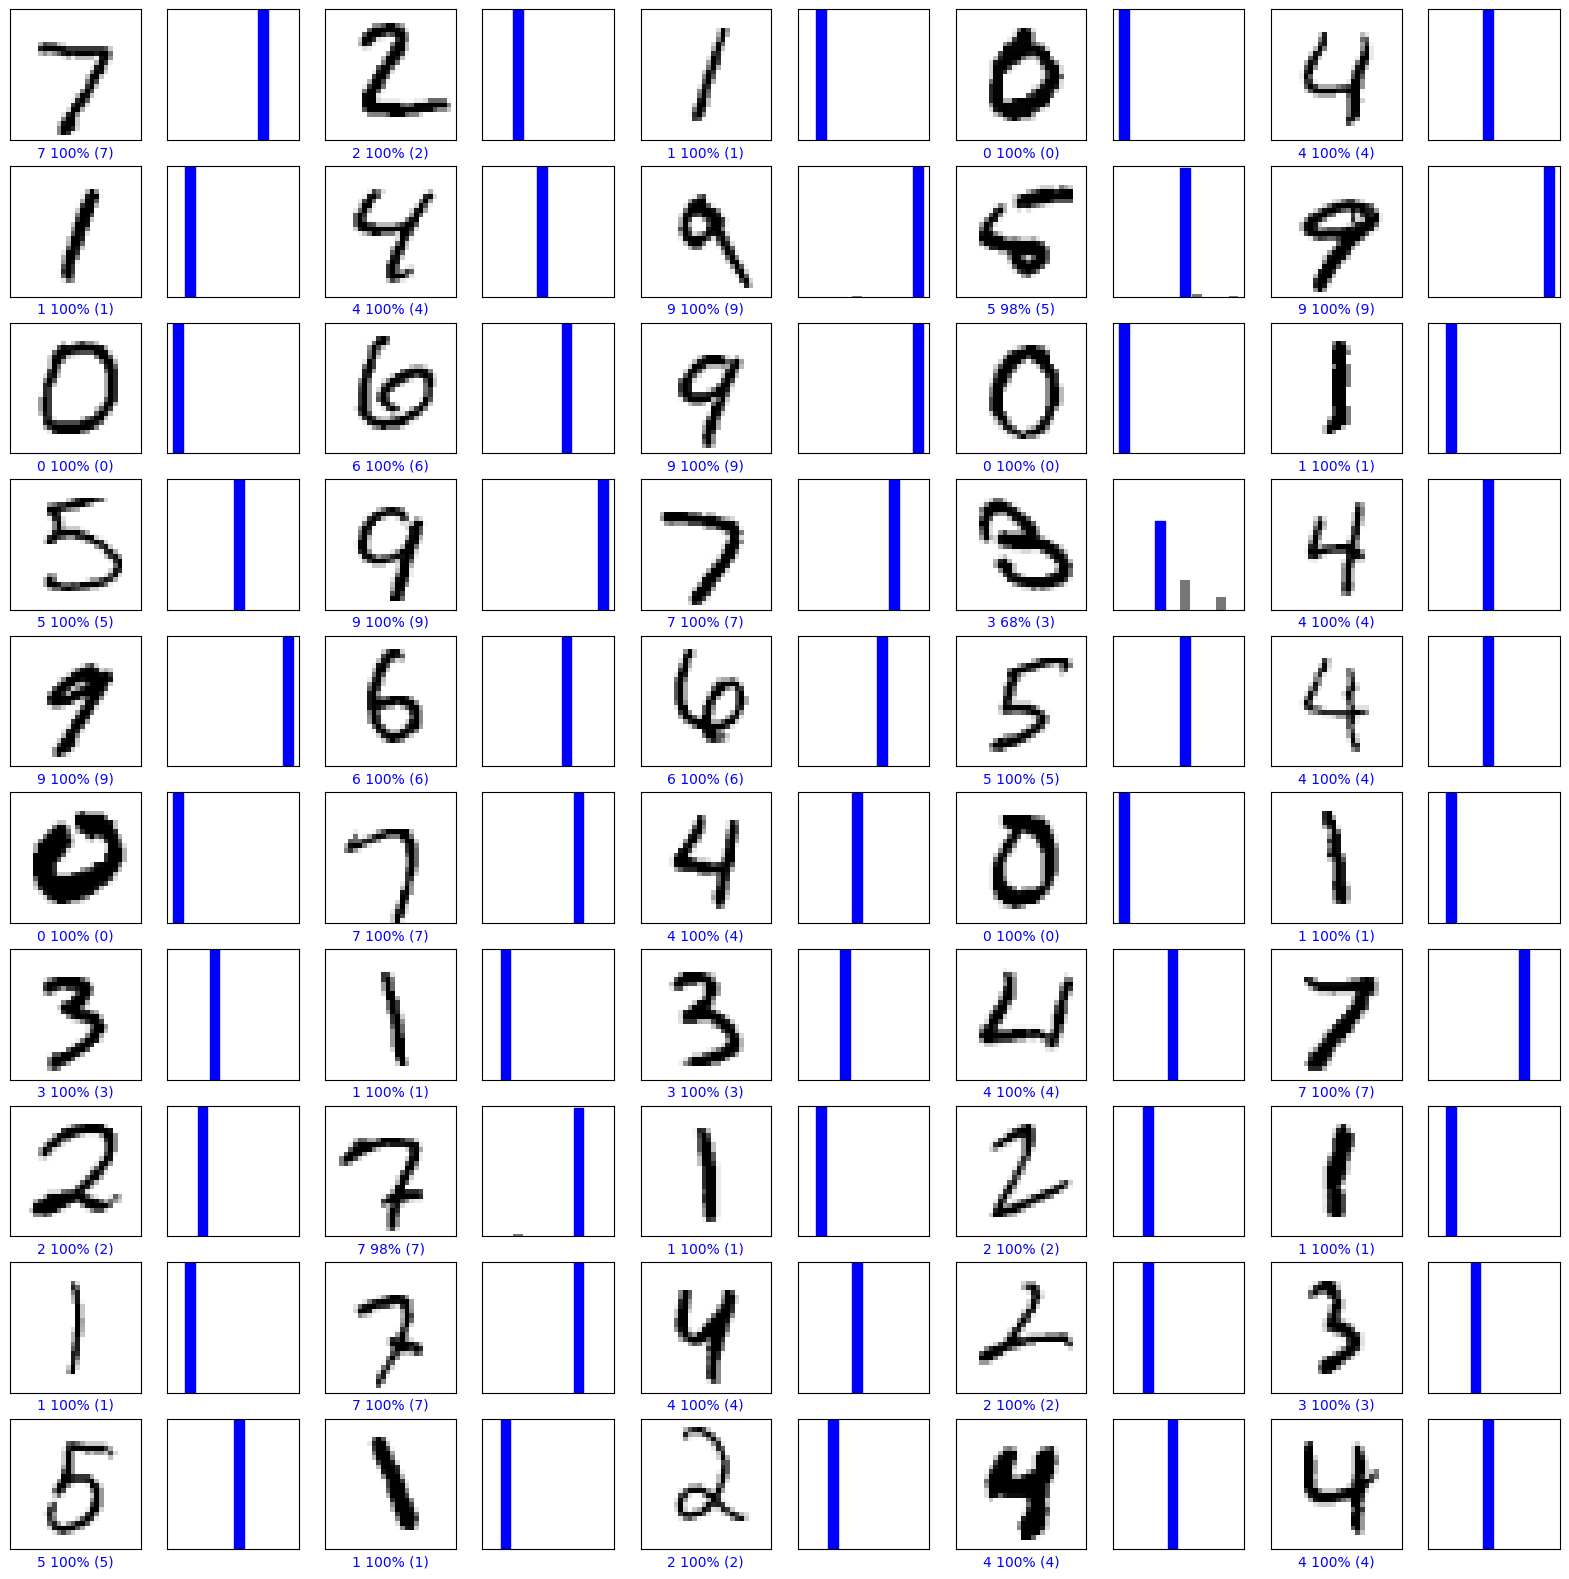

In [16]:

num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()